<a href="https://colab.research.google.com/github/PriyankaHotchandani/MLnow_2.0/blob/main/3a_Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Linear Regression
> This notebook was created for code illustration of the assignments of `Machine Learning course by GirlScript Foundation`


`Univariate Linear Regression`
<br>
`CalCOFI: Over 60 years of oceanographic data`
<br>
`Water Salinity vs Water Temperature`

[Link to Download the dataset](https://www.kaggle.com/sohier/calcofi?select=bottle.csv)

**Date Created**: June 9, 2021


**Author**:
 Priyanka Hotchandani

**Reach out**:
[Email](priyankah151@gmail.com) | [GitHub](https://github.com/PriyankaHotchandani) | [LinkedIn](https://www.linkedin.com/in/priyanka-hotchandani/)

##Loading the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/ML-GirlScript/LiveCodingSessions/03_LinearRegression/Dataset'

/content/drive/MyDrive/ML-GirlScript/LiveCodingSessions/03_LinearRegression/Dataset


In [3]:
ls

bottle.csv               heart_failure_clinical_records_dataset.csv
datasetsatisfaction.csv  univariate_patientData_2.csv


In [4]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
from tensorflow import keras  
import os 
import matplotlib.pyplot as plt

In [5]:
oceanData = pd.read_csv('bottle.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
oceanData.head(10)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,NaN,25.651,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,30.0,10.45,10.45,33.431,25.65,233.5,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,NaN,25.658,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,39.0,10.45,10.45,33.440,25.65,233.0,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,NaN,25.682,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,50.0,10.24,10.23,33.424,25.68,231.0,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,NaN,25.710,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,58.0,10.06,10.05,33.420,25.71,228.5,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,NaN,25.801,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,75.0,9.86,9.85,33.494,25.80,220.1,0.17,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
oceanData['T_degC'].fillna(oceanData['T_degC'].mean(), inplace=True)

In [8]:
oceanData['Salnty'].fillna(oceanData['Salnty'].mean(), inplace=True)

##Exploratory Data Analysis

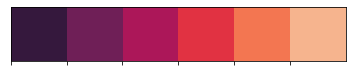

In [9]:
import seaborn as sns
sns.palplot(sns.color_palette('rocket'))

In [12]:
print(f'''There are {len(oceanData.columns)} columns in the given dataset about oceanographic data namely, 

{oceanData.columns}''')

There are 74 columns in the given dataset about oceanographic data namely, 

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


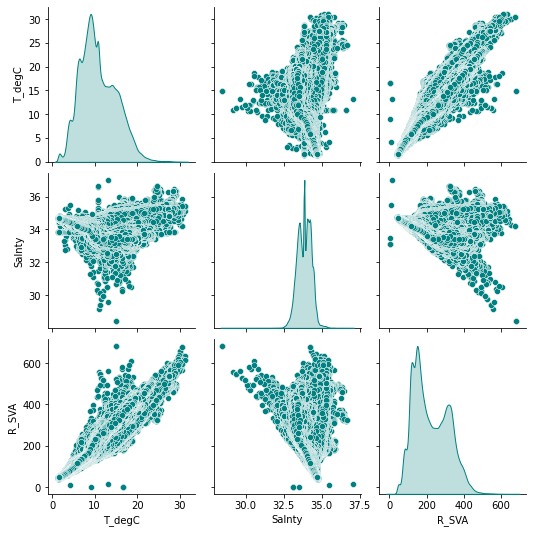

In [18]:
sns_colors = ['#008080']
sns.set_palette(sns_colors) 
sns.pairplot(oceanData, x_vars = ['T_degC', 'Salnty', 'R_SVA'], y_vars = ['T_degC', 'Salnty', 'R_SVA'], diag_kind='kde')

In [22]:
uniOceanData = oceanData[['T_degC',	'Salnty']]
uniOceanData.head(5)

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [23]:
uniOceanData.to_csv('univariate_oceanData_2.csv')

In [24]:
ls

bottle.csv                                  univariate_oceanData_2.csv
datasetsatisfaction.csv                     univariate_patientData_2.csv
heart_failure_clinical_records_dataset.csv


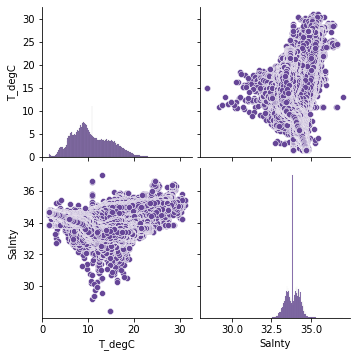

In [25]:
sns_colors = ['#664697'] 
sns.set_palette(sns_colors) 
sns.pairplot(uniOceanData,
             x_vars = ['T_degC',	'Salnty'],
             y_vars =  ['T_degC',	'Salnty'],
       diag_kind='hist'
             )

In [26]:
uniOceanData.columns

Index(['T_degC', 'Salnty'], dtype='object')

##Splitting the Dataset

In [28]:
split = 0.7 #@param {type:'slider',min:'0.4',max:'1.0',step:'0.05'}
trainData = uniOceanData.sample(frac=split, random_state=0) 
testData = uniOceanData.drop(trainData.index)

print(trainData.head())
print(testData.head())

        T_degC  Salnty
660020   16.26  33.672
159082   10.68  33.738
295483   18.02  34.000
743309    8.07  34.025
706285   15.30  33.326
    T_degC  Salnty
1    10.46  33.440
4    10.45  33.421
10    9.83  33.510
15    8.71  33.860
16    8.53  33.876


In [29]:
print(trainData.shape)
print(testData.shape)

(605404, 2)
(259459, 2)


In [30]:
trainFeatures = trainData.copy()
testFeatures = testData.copy()

print(trainFeatures.head())
print(testFeatures.head())

        T_degC  Salnty
660020   16.26  33.672
159082   10.68  33.738
295483   18.02  34.000
743309    8.07  34.025
706285   15.30  33.326
    T_degC  Salnty
1    10.46  33.440
4    10.45  33.421
10    9.83  33.510
15    8.71  33.860
16    8.53  33.876


In [31]:
trainLabels = trainFeatures.pop('Salnty')
testLabels = testFeatures.pop('Salnty')

print(trainLabels.head())
print(testLabels.head())

660020    33.672
159082    33.738
295483    34.000
743309    34.025
706285    33.326
Name: Salnty, dtype: float64
1     33.440
4     33.421
10    33.510
15    33.860
16    33.876
Name: Salnty, dtype: float64


In [32]:
print(trainFeatures.head())
print(testFeatures.head())

        T_degC
660020   16.26
159082   10.68
295483   18.02
743309    8.07
706285   15.30
    T_degC
1    10.46
4    10.45
10    9.83
15    8.71
16    8.53


##Building the Model

In [33]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [34]:
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
    metrics = ['mae', 'mse'] 
)

In [35]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='mae',patience=5)

In [36]:
numEpochs = 50
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs, callbacks=early_stopping)

Epoch 1/50
18919/18919 [==============================] - 46s 2ms/step - loss: 9.1838 - mae: 9.1838 - mse: 127.5006 - val_loss: 5.7806 - val_mae: 5.7806 - val_mse: 46.4389
Epoch 2/50
18919/18919 [==============================] - 45s 2ms/step - loss: 3.2696 - mae: 3.2696 - mse: 17.6798 - val_loss: 0.8077 - val_mae: 0.8077 - val_mse: 0.9069
Epoch 3/50
18919/18919 [==============================] - 42s 2ms/step - loss: 0.3053 - mae: 0.3053 - mse: 0.2026 - val_loss: 0.2647 - val_mae: 0.2647 - val_mse: 0.1629
Epoch 4/50
18919/18919 [==============================] - 45s 2ms/step - loss: 0.2653 - mae: 0.2653 - mse: 0.1654 - val_loss: 0.2653 - val_mae: 0.2653 - val_mse: 0.1620
Epoch 5/50
18919/18919 [==============================] - 42s 2ms/step - loss: 0.2653 - mae: 0.2653 - mse: 0.1654 - val_loss: 0.2645 - val_mae: 0.2645 - val_mse: 0.1656
Epoch 6/50
18919/18919 [==============================] - 41s 2ms/step - loss: 0.2653 - mae: 0.2653 - mse: 0.1654 - val_loss: 0.2647 - val_mae: 0.2647 

In [37]:
print(history)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


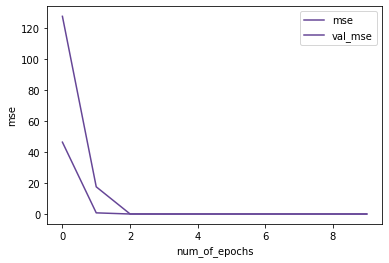

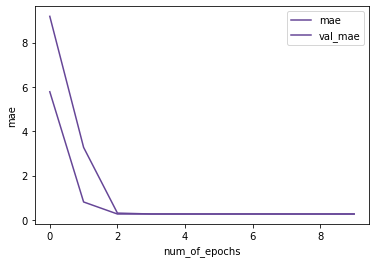

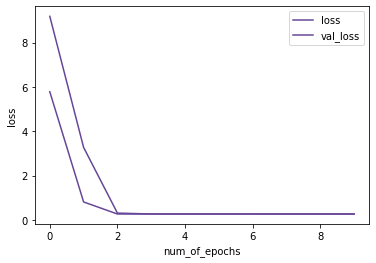

In [40]:
def curve_plots(loss_type):
  plt.plot(history.history[loss_type])
  plt.plot(history.history[f'val_{loss_type}'])
  plt.xlabel('num_of_epochs')
  plt.ylabel(loss_type)
  plt.legend([loss_type, f'val_{loss_type}'])
  plt.show()

curve_plots('mse')
curve_plots('mae')
curve_plots('loss')

##Prediction Results

In [41]:
model.predict([1])

array([[34.57955]], dtype=float32)

In [42]:
print(f'Prediction for input value 1: {model.predict([1])}')

tempListforPreds = [7,8,3,5,9]
print(f'''
input List = {tempListforPreds}

List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[34.57955]]

input List = [7, 8, 3, 5, 9]

List of Predictions:
[[34.129074]
 [34.053997]
 [34.429394]
 [34.279236]
 [33.978916]]

List of Predictions (flattened out):
[34.129074 34.053997 34.429394 34.279236 33.978916]



In [43]:
print(testFeatures)

        T_degC
1       10.460
4       10.450
10       9.830
15       8.710
16       8.530
...        ...
864853   6.943
864856   5.993
864858  18.744
864860  18.692
864862  17.533

[259459 rows x 1 columns]


In [44]:
testPreds = model.predict(testFeatures).flatten()

In [45]:
print(len(testPreds))
print(testPreds)

259459
[33.8693   33.87005  33.9166   ... 33.24734  33.251244 33.33826 ]


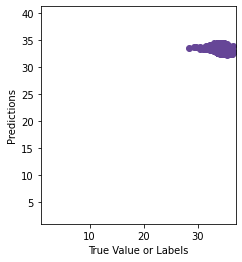

In [46]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([1, plt.xlim()[1]])
  plt.ylim([1, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

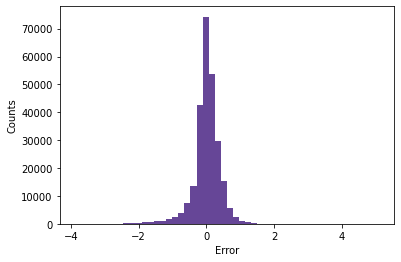

In [47]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)